In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
import torch
from torch.autograd import Variable
from IPython.display import clear_output

images = np.load('./images.npy')
labels = np.load('./labels.npy')
num_images,height,width = np.shape(images)
images = images.astype(float)
images = np.reshape(images,(num_images,height*width))/255.0
np.shape(images)
print(num_images)

labels = labels.astype(int)
labels[labels!=0]=-1
labels[labels==0]=1
labels[labels==-1]=0

print(labels)


50000
[0 1 1 ..., 0 0 0]


In [90]:
x_valid = images[0:5000][:]
print(np.shape(x_valid))
y_valid = labels[0:5000]
print(np.shape(y_valid))

x_train = images[0:40000][:]
print(np.shape(x_train))
y_train = labels[0:40000]
print(np.shape(y_train))

x_test = images[0:5000][:]
print(np.shape(x_test))
y_test = labels[0:5000]
print(np.shape(y_test))

(5000, 676)
(5000,)
(40000, 676)
(40000,)
(5000, 676)
(5000,)


In [91]:
def accuracy(xtrain,ytrain,w):
    dtype = torch.DoubleTensor
    m,n = np.shape(xtrain)
    temp = np.random.randint(m,size=(1,1000))
    correct = 0.0
    x = Variable(torch.from_numpy(xtrain).type(dtype),requires_grad=False)
    for i in range(0,1000):
        index = temp[0][i]
        xi = x[index]
        z = torch.dot(w,xi)
        #g = 1/(1+torch.exp(-z))
        g = torch.sigmoid(z)
        if(g.data.numpy()>=0.5):
            y_hatnp=1
        else:
            y_hatnp=0
        if(y_hatnp==ytrain[index]):
            correct+=1   
    return((correct/1000)*100)

In [99]:
print(labels)
dtype = torch.DoubleTensor
w = Variable(torch.zeros(height*width).type(dtype), requires_grad=True)
y = Variable(torch.from_numpy(labels).type(dtype),requires_grad=False)
x = Variable(torch.from_numpy(images).type(dtype),requires_grad=False)
index = 0
train_acc = np.zeros(400*5,dtype=float)
valid_acc = np.zeros(400*5,dtype=float)
for epoch in range(0,5):
    print('epoch number=',epoch+1)
    for i in range(0,40000):
        xi = x[i]
        yi = y[i]
        z = torch.dot(w,xi).clamp(min=-50.0,max = +50.0)
        #g = 1/(1+torch.exp(-z))
        #g_ = 1/(1+torch.exp(z))
        g = torch.sigmoid(z)
        #print(g)
        g_ = torch.sigmoid(-z)
        #print(g_)


        Loss = -(yi*torch.log(g) + (1-yi)*torch.log(g_))
        Loss.backward()
        w.data= w.data-0.001*w.grad.data
        w.grad.data.zero_()
        #print(w.grad)
        if(i%100==0):
            train_acc[index] = accuracy(x_train,y_train,w)
            valid_acc[index] = accuracy(x_valid,y_valid,w)
            index+=1
            print(i/400,'%', end=' ', flush=False)
    clear_output()

average accuracy =  96.50125


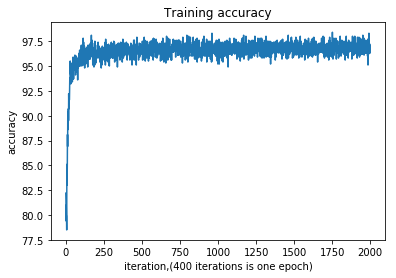

In [103]:
plt.plot(train_acc)
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration,(400 iterations is one epoch)')
print('average accuracy = ',np.mean(train_acc))

average accuracy =  96.0785


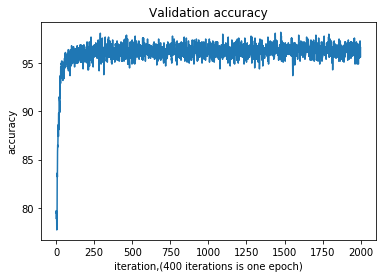

In [105]:
plt.plot(valid_acc)
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration,(400 iterations is one epoch)')
print('average accuracy = ',np.mean(valid_acc))

No, you are not overfitting the data here